In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

In [2]:
# import all from /raw_data/
all_acc_csvs = glob.glob(os.getcwd() + "/raw_data/accelerometer/*.csv")
all_gyro_csvs = glob.glob(os.getcwd() + "/raw_data/gyroscope/*.csv")

sensor_df = pd.DataFrame()
for acc_file, gyro_file in zip(all_acc_csvs, all_gyro_csvs):
    acc_df = pd.read_csv(acc_file).loc[:, ["Timestamp", "x", "y", "z", "payload"]] \
        .rename(columns={"x": "acc_x", "y": "acc_y", "z": "acc_z"})

    gyro_df = pd.read_csv(gyro_file).loc[:, ["Timestamp", "x", "y", "z", "payload"]] \
        .rename(columns={"x": "gyro_x", "y": "gyro_y", "z": "gyro_z"})

    combined_df = pd.merge_asof(acc_df, gyro_df, on="Timestamp", direction="nearest") \
        .loc[:, ["Timestamp", "acc_x", "acc_y", "acc_z", "gyro_x", "gyro_y", "gyro_z", "payload_x"]] \
            .rename(columns={"payload_x": "payload"})

    sensor_df = pd.concat([sensor_df, combined_df], axis=0)

print(sensor_df.head())

       Timestamp     acc_x     acc_y     acc_z    gyro_x    gyro_y    gyro_z  \
0  1635795726374  0.097616 -0.286260  9.816671  0.003995  0.000932  0.000266   
1  1635795726386  0.116780 -0.257514  9.831044  0.003995  0.000932  0.000266   
2  1635795726399  0.063480 -0.238350  9.816671  0.003995  0.000932  0.000266   
3  1635795726411  0.053898 -0.223977  9.807688  0.003995  0.000932  0.000266   
4  1635795726425  0.088034 -0.228768  9.840626  0.003995  0.000932  0.000266   

  payload  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  


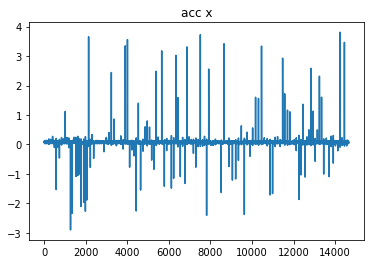

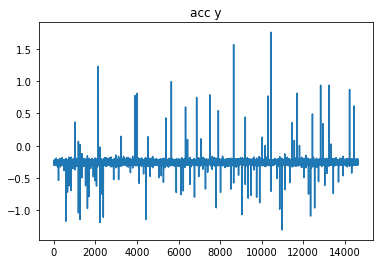

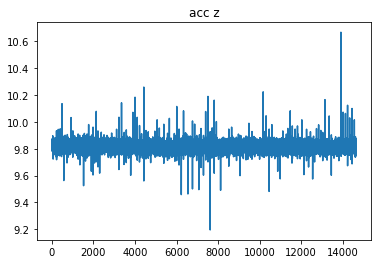

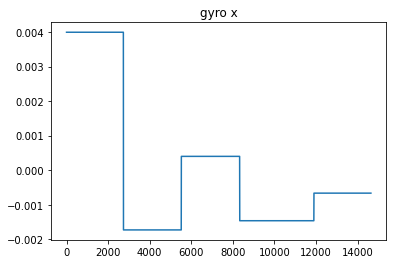

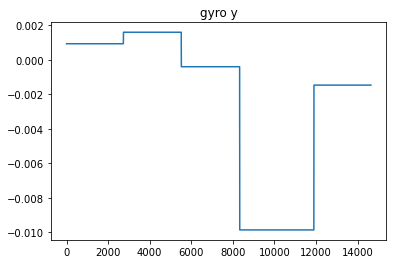

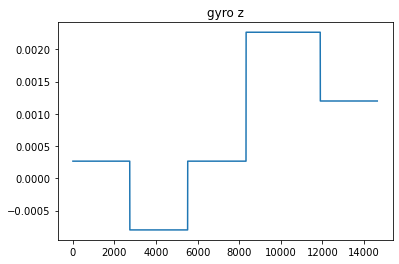

In [3]:
for sensor in ["acc", "gyro"]:
    plt.plot(range(len(sensor_df)), sensor_df[sensor + "_x"])
    plt.title(sensor + " x")
    plt.show()
    plt.plot(range(len(sensor_df)), sensor_df[sensor + "_y"])
    plt.title(sensor + " y")
    plt.show()
    plt.plot(range(len(sensor_df)), sensor_df[sensor + "_z"])
    plt.title(sensor + " z")
    plt.show()

In [4]:
current_payload = None
payload_change_indices = []
y_final_payload = []
print("Payload: ")
for index, reading in enumerate(sensor_df.values):
    if str(reading[7]) != "nan" and reading[7] != current_payload:
        current_payload = reading[7]
        added_symbol = str(current_payload[-1])

        payload_change_indices.append(index)
        y_final_payload.append(added_symbol)
        print(added_symbol, end='')

print("\n", "# of readings:", len(sensor_df.values))
print(" # of payload changes:", len(payload_change_indices))
print(" Payload change indices:", payload_change_indices)

Payload: 
AbcdefghijklmnopqrstuvwxyzAbcdefghijklmnopqrstuvwxyAbcdefghijklmnopqrstuvwxyAbcdefghijklmnopqrstuvwxyAbcdefghijklmnopqrstuvwxy
 # of readings: 14642
 # of payload changes: 126
 Payload change indices: [234, 318, 409, 499, 583, 663, 741, 844, 936, 1022, 1108, 1191, 1276, 1358, 1445, 1529, 1625, 1703, 1779, 1910, 1990, 2062, 2145, 2228, 2307, 2386, 2886, 2999, 3123, 3238, 3361, 3477, 3587, 3692, 3798, 3907, 4012, 4115, 4223, 4324, 4433, 4535, 4646, 4762, 4861, 4966, 5072, 5177, 5281, 5394, 5491, 5659, 5786, 5898, 6015, 6128, 6233, 6342, 6437, 6554, 6667, 6772, 6878, 6979, 7082, 7187, 7302, 7408, 7517, 7626, 7718, 7820, 7921, 8027, 8126, 8239, 8521, 8658, 8895, 9062, 9219, 9351, 9491, 9636, 9766, 9911, 10039, 10178, 10316, 10462, 10594, 10733, 10874, 10994, 11122, 11233, 11359, 11477, 11577, 11711, 11825, 12032, 12134, 12259, 12357, 12448, 12552, 12646, 12741, 12843, 12947, 13041, 13148, 13246, 13348, 13451, 13578, 13700, 13810, 13912, 14015, 14128, 14231, 14335, 14447, 14558]


In [5]:
important_indices = []
X_sequences = []
N_SURROUNDING = 10
for index in payload_change_indices:
    X_sequences.append(range(index - N_SURROUNDING , index + N_SURROUNDING))
    for i in range(index - N_SURROUNDING , index + N_SURROUNDING):
        if i >= 0 and i < len(sensor_df.values) and not (i in important_indices):
            important_indices.append(i)

print("# of relevant readings:", len(important_indices))
#print(important_indices)

# of relevant readings: 2520


In [6]:
X = np.array([sensor_df.iloc[seq, 1:].values for seq in X_sequences])
print("Sequence Rows:", X.shape)
y = np.array([char.lower() for char in y_final_payload]).reshape(-1,1)
print("Payload:", y)

Sequence Rows: (126, 20, 7)
Payload: [['a']
 ['b']
 ['c']
 ['d']
 ['e']
 ['f']
 ['g']
 ['h']
 ['i']
 ['j']
 ['k']
 ['l']
 ['m']
 ['n']
 ['o']
 ['p']
 ['q']
 ['r']
 ['s']
 ['t']
 ['u']
 ['v']
 ['w']
 ['x']
 ['y']
 ['z']
 ['a']
 ['b']
 ['c']
 ['d']
 ['e']
 ['f']
 ['g']
 ['h']
 ['i']
 ['j']
 ['k']
 ['l']
 ['m']
 ['n']
 ['o']
 ['p']
 ['q']
 ['r']
 ['s']
 ['t']
 ['u']
 ['v']
 ['w']
 ['x']
 ['y']
 ['a']
 ['b']
 ['c']
 ['d']
 ['e']
 ['f']
 ['g']
 ['h']
 ['i']
 ['j']
 ['k']
 ['l']
 ['m']
 ['n']
 ['o']
 ['p']
 ['q']
 ['r']
 ['s']
 ['t']
 ['u']
 ['v']
 ['w']
 ['x']
 ['y']
 ['a']
 ['b']
 ['c']
 ['d']
 ['e']
 ['f']
 ['g']
 ['h']
 ['i']
 ['j']
 ['k']
 ['l']
 ['m']
 ['n']
 ['o']
 ['p']
 ['q']
 ['r']
 ['s']
 ['t']
 ['u']
 ['v']
 ['w']
 ['x']
 ['y']
 ['a']
 ['b']
 ['c']
 ['d']
 ['e']
 ['f']
 ['g']
 ['h']
 ['i']
 ['j']
 ['k']
 ['l']
 ['m']
 ['n']
 ['o']
 ['p']
 ['q']
 ['r']
 ['s']
 ['t']
 ['u']
 ['v']
 ['w']
 ['x']
 ['y']]


In [7]:
# normalize the data?
# transformations?

In [8]:
# output to /processed_data/
np.save(os.getcwd() + "/processed_data/proc_X.npy", X)
np.save(os.getcwd() + "/processed_data/proc_y.npy", y)